# Deezer Graph Analysis -- Arno & Erwan

## Graph import

In [1]:
import csv
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities

# Create the Romanian Graph
G_RO = nx.Graph()
with open('deezer_clean_data/RO_edges.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        node1 = row[0]
        node2 = row[1]
        G_RO.add_edge(node1, node2)

# Create the Hungarian Graph
G_HU = nx.Graph()
with open('deezer_clean_data/HU_edges.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        node1 = row[0]
        node2 = row[1]
        G_HU.add_edge(node1, node2)

# Create the Croatian Graph
G_HR = nx.Graph()
with open('deezer_clean_data/HR_edges.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)
    for row in reader:
        node1 = row[0]
        node2 = row[1]
        G_HR.add_edge(node1, node2)

## First Analysis 

In [2]:
deezer_RO_nodes = G_RO.number_of_nodes()
deezer_RO_edges = G_RO.number_of_edges()
deezer_RO_avg_deg = 2 * deezer_RO_edges / deezer_RO_nodes 

print("Romanian Graph :")
print('Nombre de nœuds (Deezer RO):', deezer_RO_nodes)
print('Nombre de liens (Deezer RO):', deezer_RO_edges)
print('Degré moyen (Deezer RO):', deezer_RO_avg_deg)
print()

deezer_HU_nodes = G_HU.number_of_nodes()
deezer_HU_edges = G_HU.number_of_edges()
deezer_HU_avg_deg = 2 * deezer_HU_edges / deezer_HU_nodes 

print("Hungarian Graph :")
print('Nombre de nœuds (Deezer HU):', deezer_HU_nodes)
print('Nombre de liens (Deezer HU):', deezer_HU_edges)
print('Degré moyen (Deezer HU):', deezer_HU_avg_deg)
print()

deezer_HR_nodes = G_HR.number_of_nodes()
deezer_HR_edges = G_HR.number_of_edges()
deezer_HR_avg_deg = 2 * deezer_HR_edges / deezer_HR_nodes 

print("Croation Graph :")
print('Nombre de nœuds (Deezer HR):', deezer_HR_nodes)
print('Nombre de liens (Deezer HR):', deezer_HR_edges)
print('Degré moyen (Deezer HR):', deezer_HR_avg_deg)

Romanian Graph :
Nombre de nœuds (Deezer RO): 41773
Nombre de liens (Deezer RO): 125826
Degré moyen (Deezer RO): 6.024274052617719

Hungarian Graph :
Nombre de nœuds (Deezer HU): 47538
Nombre de liens (Deezer HU): 222887
Degré moyen (Deezer HU): 9.377214018259076

Croation Graph :
Nombre de nœuds (Deezer HR): 54573
Nombre de liens (Deezer HR): 498202
Degré moyen (Deezer HR): 18.258186282593957


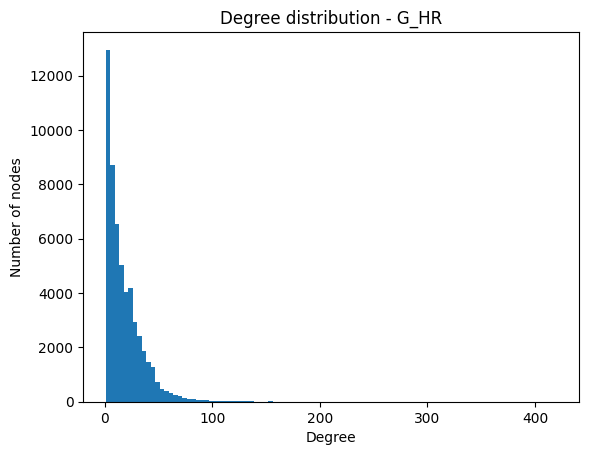

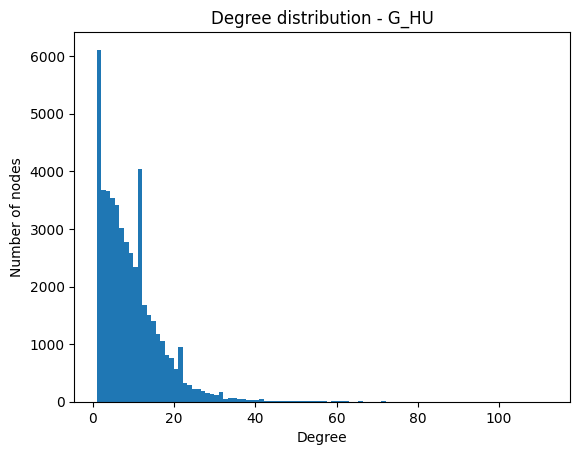

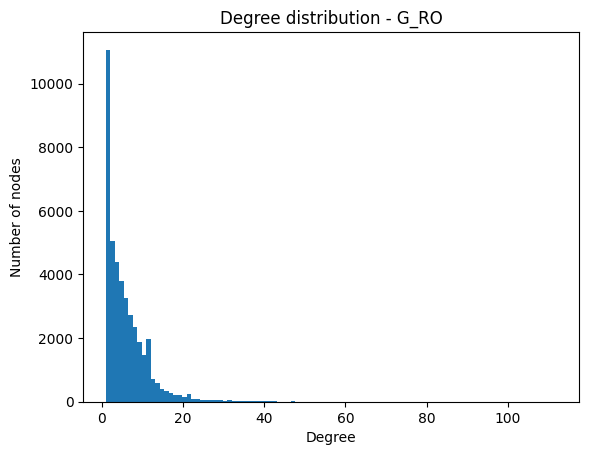

In [3]:
import matplotlib.pyplot as plt

# Plot degree distribution for G_HR
plt.figure(1)
degrees_HR = dict(G_HR.degree()).values()
degree_hist_HR = plt.hist(degrees_HR, 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution - G_HR')

# Plot degree distribution for G_HU
plt.figure(2)
degrees_HU = dict(G_HU.degree()).values()
degree_hist_HU = plt.hist(degrees_HU, 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution - G_HU')

# Plot degree distribution for G_RO
plt.figure(3)
degrees_RO = dict(G_RO.degree()).values()
degree_hist_RO = plt.hist(degrees_RO, 100)
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Degree distribution - G_RO')

plt.show()


In [4]:
import json

with open('deezer_clean_data/RO_genres.json', 'r') as file:
    genres_data_RO = json.load(file)

with open('deezer_clean_data/HU_genres.json', 'r') as file:
    genres_data_HU = json.load(file)

with open('deezer_clean_data/HR_genres.json', 'r') as file:
    genres_data_HR = json.load(file)

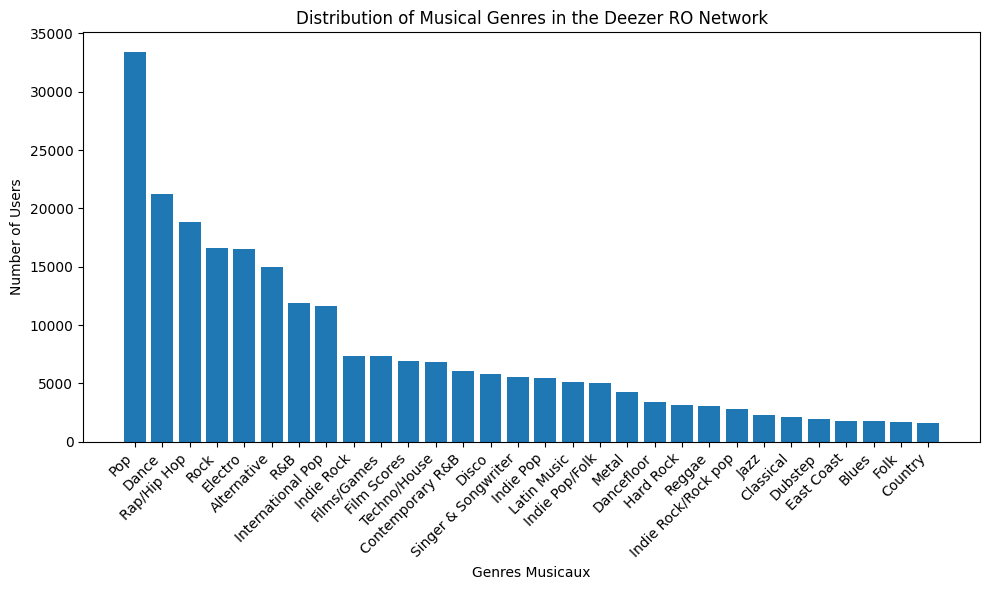

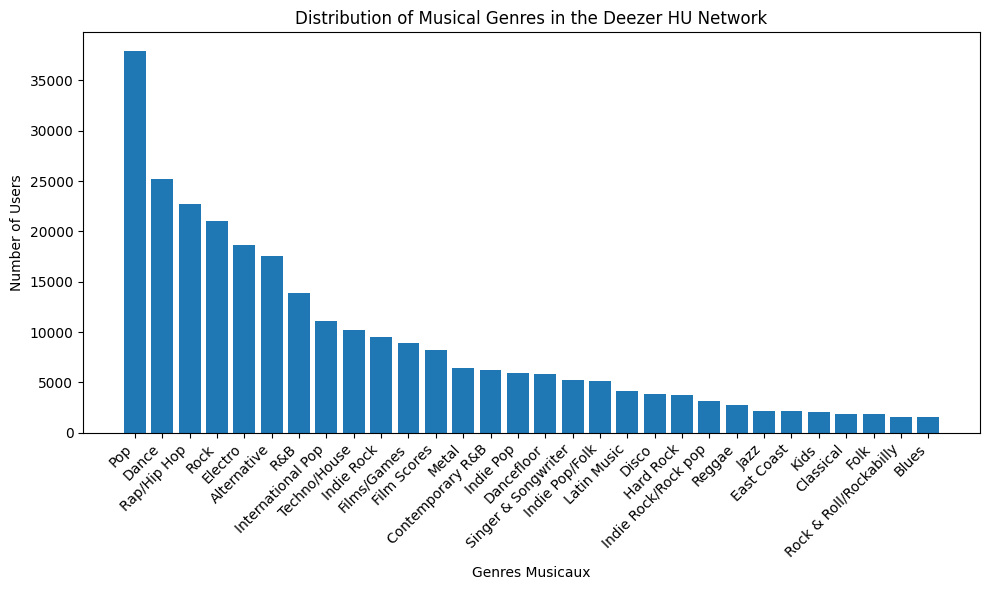

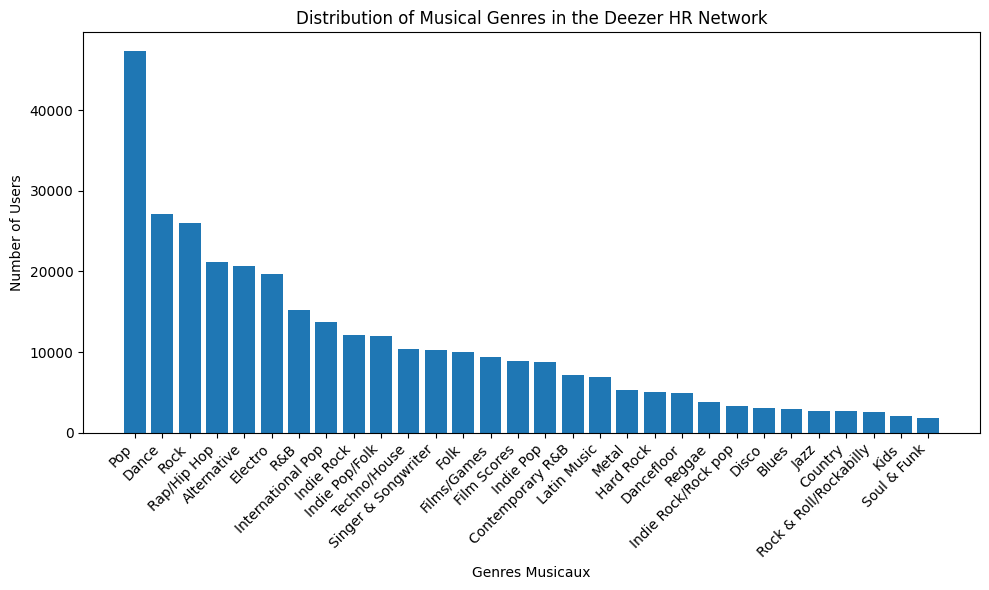

In [10]:
import matplotlib.pyplot as plt

genre_counts_RO = {}
for node_genres in genres_data_RO.values():
    for genre in node_genres:
        genre_counts_RO[genre] = genre_counts_RO.get(genre, 0) + 1

sorted_genre_counts = sorted(genre_counts_RO.items(), key=lambda x: x[1], reverse=True)
top_30_genres = sorted_genre_counts[:30]
genres = [genre for genre, count in top_30_genres]
user_counts = [count for genre, count in top_30_genres]

plt.figure(figsize=(10, 6))
plt.bar(genres, user_counts)

# Labeling axes and title
plt.xlabel('Genres Musicaux')
plt.ylabel('Number of Users')
plt.title('Distribution of Musical Genres in the Deezer RO Network')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

genre_counts_HU = {}
for node_genres in genres_data_HU.values():
    for genre in node_genres:
        genre_counts_HU[genre] = genre_counts_HU.get(genre, 0) + 1

sorted_genre_counts = sorted(genre_counts_HU.items(), key=lambda x: x[1], reverse=True)
top_30_genres = sorted_genre_counts[:30]
genres = [genre for genre, count in top_30_genres]
user_counts = [count for genre, count in top_30_genres]

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(genres, user_counts)

# Labeling axes and title
plt.xlabel('Genres Musicaux')
plt.ylabel('Number of Users')
plt.title('Distribution of Musical Genres in the Deezer HU Network')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

genre_counts_HR = {}
for node_genres in genres_data_HR.values():
    for genre in node_genres:
        genre_counts_HR[genre] = genre_counts_HR.get(genre, 0) + 1

sorted_genre_counts = sorted(genre_counts_HR.items(), key=lambda x: x[1], reverse=True)
top_30_genres = sorted_genre_counts[:30]
genres = [genre for genre, count in top_30_genres]
user_counts = [count for genre, count in top_30_genres]

plt.figure(figsize=(10, 6))
plt.bar(genres, user_counts)

# Labeling axes and title
plt.xlabel('Genres Musicaux')
plt.ylabel('Number of Users')
plt.title('Distribution of Musical Genres in the Deezer HR Network')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Analyse de Centralité

In [30]:
try :
    betweenness_RO = nx.betweenness_centrality(G_RO)
    print('Romanian deezer betweenness centrality:', sorted(betweenness_RO.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing betweenness centrality for Romanian Deezer")
try :   
    eigencentrality_RO = nx.eigenvector_centrality(G_RO)
    print('Romanian deezer eigenvector centrality:', sorted(eigencentrality_RO.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing eigenvector centrality for Romanian Deezer")
try :
    degree_cent_RO = nx.degree_centrality(G_RO)
    print('Romanian deezer degree centrality:', sorted(degree_cent_RO.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing degree centrality for Romanian Deezer")

try :
    betweenness_HU = nx.betweenness_centrality(G_HU)
    print('Hungarian deezer betweenness centrality:', sorted(betweenness_HU.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing betweenness centrality for Hungarian Deezer")
try :   
    eigencentrality_HU = nx.eigenvector_centrality(G_HU)
    print('Hungarian deezer eigenvector centrality:', sorted(eigencentrality_HU.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing eigenvector centrality for Hungarian Deezer")
try :
    degree_cent_HU = nx.degree_centrality(G_HU)
    print('Hungarian deezer degree centrality:', sorted(degree_cent_HU.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing degree centrality for Hungarian Deezer")

try :
    betweenness_HR = nx.betweenness_centrality(G_HR)
    print('Croatian deezer betweenness centrality:', sorted(betweenness_HR.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing betweenness centrality for Croatian Deezer")
try :   
    eigencentrality_HR = nx.eigenvector_centrality(G_HR)
    print('Croatian deezer eigenvector centrality:', sorted(eigencentrality_HR.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing eigenvector centrality for Croatian Deezer")
try :
    degree_cent_HR = nx.degree_centrality(G_HR)
    print('Croatian deezer degree centrality:', sorted(degree_cent_HR.items(), key = lambda x: x[1], reverse = True)[:3])
except :
    print("Error computing degree centrality for Croatian Deezer")

Romanian deezer betweenness centrality: [('17205', 0.015050562326396334), ('5112', 0.01314546381202052), ('2003', 0.012178323323454152)]
Romanian deezer eigenvector centrality: [('10426', 0.3289094614835633), ('2003', 0.3210992974320844), ('10923', 0.21649167429315563)]
Romanian deezer degree centrality: [('2003', 0.002681221871109834), ('10426', 0.0026572823901177822), ('17205', 0.00217849277027674)]
Hungarian deezer betweenness centrality: [('14900', 0.007857470377709437), ('40491', 0.006254428542808884), ('24218', 0.0051631224668602736)]
Hungarian deezer eigenvector centrality: [('42470', 0.21828321879131396), ('12907', 0.21623040007531275), ('31974', 0.20756640776120552)]
Hungarian deezer degree centrality: [('14900', 0.002356059490502135), ('40491', 0.0020405158087384565), ('38301', 0.0019353345814838968)]
Croatian deezer betweenness centrality: [('43244', 0.02837906440699178), ('52793', 0.018113836276745187), ('32083', 0.012144770948819876)]
Croatian deezer eigenvector centrality

In [67]:
import json

with open("centrality/betweenness_RO.json", "r") as f:
    betweenness_RO = json.load(f)

with open("centrality/betweenness_HU.json", "r") as f:
    betweenness_HU = json.load(f)

with open("centrality/betweenness_HR.json", "r") as f:
    betweenness_HR = json.load(f)


with open("centrality/degree_cent_RO.json", "r") as f:
    degree_cent_RO = json.load(f)

with open("centrality/degree_cent_HU.json", "r") as f:
    degree_cent_HU = json.load(f)

with open("centrality/degree_cent_HR.json", "r") as f:
    degree_cent_HR = json.load(f)


with open("centrality/eigencentrality_RO.json", "r") as f:
    eigencentrality_RO = json.load(f)

with open("centrality/eigencentrality_HU.json", "r") as f:
    eigencentrality_HU = json.load(f)

with open("centrality/eigencentrality_HR.json", "r") as f:
    eigencentrality_HR = json.load(f)

print("All centrality measures loaded from files")

All centrality measures loaded from files


In [42]:

best_nodes_betweenness = set(sorted(betweenness_RO, key=betweenness_RO.get, reverse=True)[:1000])
best_nodes_closeness = set(sorted(eigencentrality_RO, key=eigencentrality_RO.get, reverse=True)[:1000])
best_nodes_eigencentrality = set(sorted(degree_cent_RO, key=degree_cent_RO.get, reverse=True)[:1000])

# Création d'une liste pour faciliter l'itération
top_nodes_lists = [best_nodes_betweenness, best_nodes_closeness, best_nodes_eigencentrality]
labels = ["Betweenness", "Eigenvector", "Degree"]

# Calcul de la matrice de pourcentage commun
percentage_matrix_RO = [[None for _ in range(3)] for _ in range(3)]

for i in range(3):
    for j in range(3):
        if i == j:
            percentage_matrix_RO[i][j] = 100.0
        else:
            common_nodes = len(top_nodes_lists[i].intersection(top_nodes_lists[j]))
            percentage_matrix_RO[i][j] = int(common_nodes / 1000 * 100)

            
print("Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Roumanie:")
for i, row in enumerate(percentage_matrix_RO):
    print(f"{labels[i]}: {row}")

best_nodes_betweenness = set(sorted(betweenness_HU, key=betweenness_HU.get, reverse=True)[:1000])
best_nodes_closeness = set(sorted(eigencentrality_HU, key=eigencentrality_HU.get, reverse=True)[:1000])
best_nodes_eigencentrality = set(sorted(degree_cent_HU, key=degree_cent_HU.get, reverse=True)[:1000])

# Création d'une liste pour faciliter l'itération
top_nodes_lists = [best_nodes_betweenness, best_nodes_closeness, best_nodes_eigencentrality]
labels = ["Betweenness", "Eigenvector", "Degree"]

# Calcul de la matrice de pourcentage commun
percentage_matrix_HU = [[None for _ in range(3)] for _ in range(3)]

for i in range(3):
    for j in range(3):
        if i == j:
            percentage_matrix_HU[i][j] = 100.0
        else:
            common_nodes = len(top_nodes_lists[i].intersection(top_nodes_lists[j]))
            percentage_matrix_HU[i][j] = int(common_nodes / 1000 * 100)

            
print("Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Hongrie:")
for i, row in enumerate(percentage_matrix_HU):
    print(f"{labels[i]}: {row}")



best_nodes_betweenness = set(sorted(betweenness_HR, key=betweenness_HR.get, reverse=True)[:1000])
best_nodes_closeness = set(sorted(eigencentrality_HR, key=eigencentrality_HR.get, reverse=True)[:1000])
best_nodes_eigencentrality = set(sorted(degree_cent_HR, key=degree_cent_HR.get, reverse=True)[:1000])

# Création d'une liste pour faciliter l'itération
top_nodes_lists = [best_nodes_betweenness, best_nodes_closeness, best_nodes_eigencentrality]
labels = ["Betweenness", "Eigenvector", "Degree"]

# Calcul de la matrice de pourcentage commun
percentage_matrix_HR = [[None for _ in range(3)] for _ in range(3)]

for i in range(3):
    for j in range(3):
        if i == j:
            percentage_matrix_HR[i][j] = 100.0
        else:
            common_nodes = len(top_nodes_lists[i].intersection(top_nodes_lists[j]))
            percentage_matrix_HR[i][j] = int(common_nodes / 1000 * 100)


print("Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Croatie:")
for i, row in enumerate(percentage_matrix_HR):
    print(f"{labels[i]}: {row}")

Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Roumanie:
Betweenness: [100.0, 26, 65]
Eigenvector: [26, 100.0, 22]
Degree: [65, 22, 100.0]
Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Hongrie:
Betweenness: [100.0, 23, 69]
Eigenvector: [23, 100.0, 23]
Degree: [69, 23, 100.0]
Pourcentage de nœuds communs entre les top 1000 nœuds pour chaque type de centralité en Croatie:
Betweenness: [100.0, 32, 55]
Eigenvector: [32, 100.0, 57]
Degree: [55, 57, 100.0]


/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:11: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:12: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



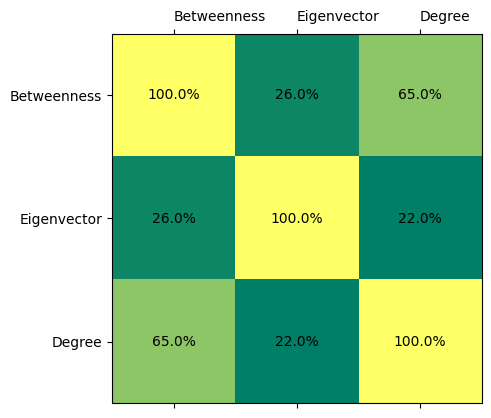

/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:29: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:30: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



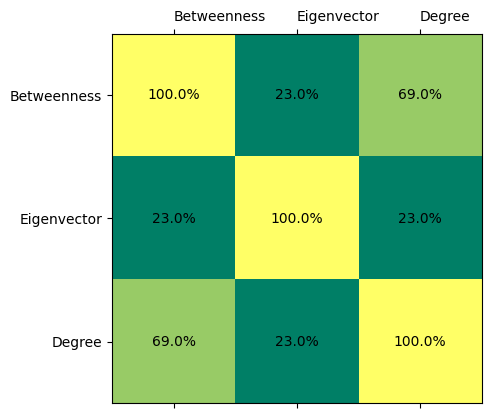

/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:47: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/2c/w923f0zj5w34cktd76cx92n40000gq/T/ipykernel_62650/1084349955.py:48: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



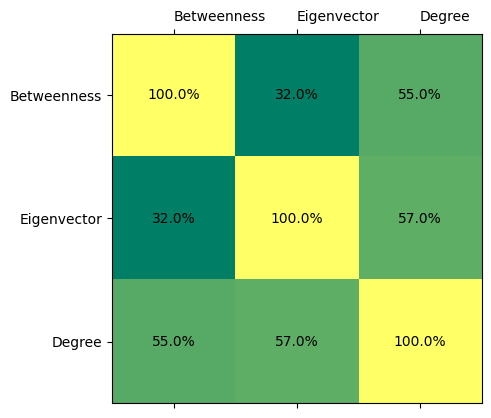

In [55]:
import numpy as np

data = np.array(percentage_matrix_RO)

labels = ["Betweenness", "Eigenvector", "Degree"]
fig, ax = plt.subplots()
heat_map = ax.matshow(data, cmap="summer")


# Définition des étiquettes pour les axes
ax.set_xticklabels([''] + labels, ha="left")
ax.set_yticklabels([''] + labels)

# Ajout d'annotations pour chaque cellule
for (i, j), val in np.ndenumerate(data):
    ax.text(j, i, f'{val:}%', va='center', ha='center')

plt.show()


data = np.array(percentage_matrix_HU)

labels = ["Betweenness", "Eigenvector", "Degree"]
fig, ax = plt.subplots()
heat_map = ax.matshow(data, cmap="summer")


# Définition des étiquettes pour les axes
ax.set_xticklabels([''] + labels, ha="left")
ax.set_yticklabels([''] + labels)

# Ajout d'annotations pour chaque cellule
for (i, j), val in np.ndenumerate(data):
    ax.text(j, i, f'{val:}%', va='center', ha='center')

plt.show()


data = np.array(percentage_matrix_HR)

labels = ["Betweenness", "Eigenvector", "Degree"]
fig, ax = plt.subplots()
heat_map = ax.matshow(data, cmap="summer")


# Définition des étiquettes pour les axes
ax.set_xticklabels([''] + labels, ha="left")
ax.set_yticklabels([''] + labels)

# Ajout d'annotations pour chaque cellule
for (i, j), val in np.ndenumerate(data):
    ax.text(j, i, f'{val:}%', va='center', ha='center')

plt.show()

In [32]:
import json

with open('betweenness_RO.json', 'w') as file:
    json.dump(betweenness_RO, file)
with open('eigencentrality_RO.json', 'w') as file:
    json.dump(eigencentrality_RO, file)
with open('degree_cent_RO.json', 'w') as file:
    json.dump(degree_cent_RO, file)

with open('betweenness_HU.json', 'w') as file:
    json.dump(betweenness_HU, file)
with open('eigencentrality_HU.json', 'w') as file:
    json.dump(eigencentrality_HU, file)
with open('degree_cent_HU.json', 'w') as file:
    json.dump(degree_cent_HU, file)

with open('betweenness_HR.json', 'w') as file:
    json.dump(betweenness_HR, file)
with open('eigencentrality_HR.json', 'w') as file:
    json.dump(eigencentrality_HR, file)
with open('degree_cent_HR.json', 'w') as file:
    json.dump(degree_cent_HR, file)

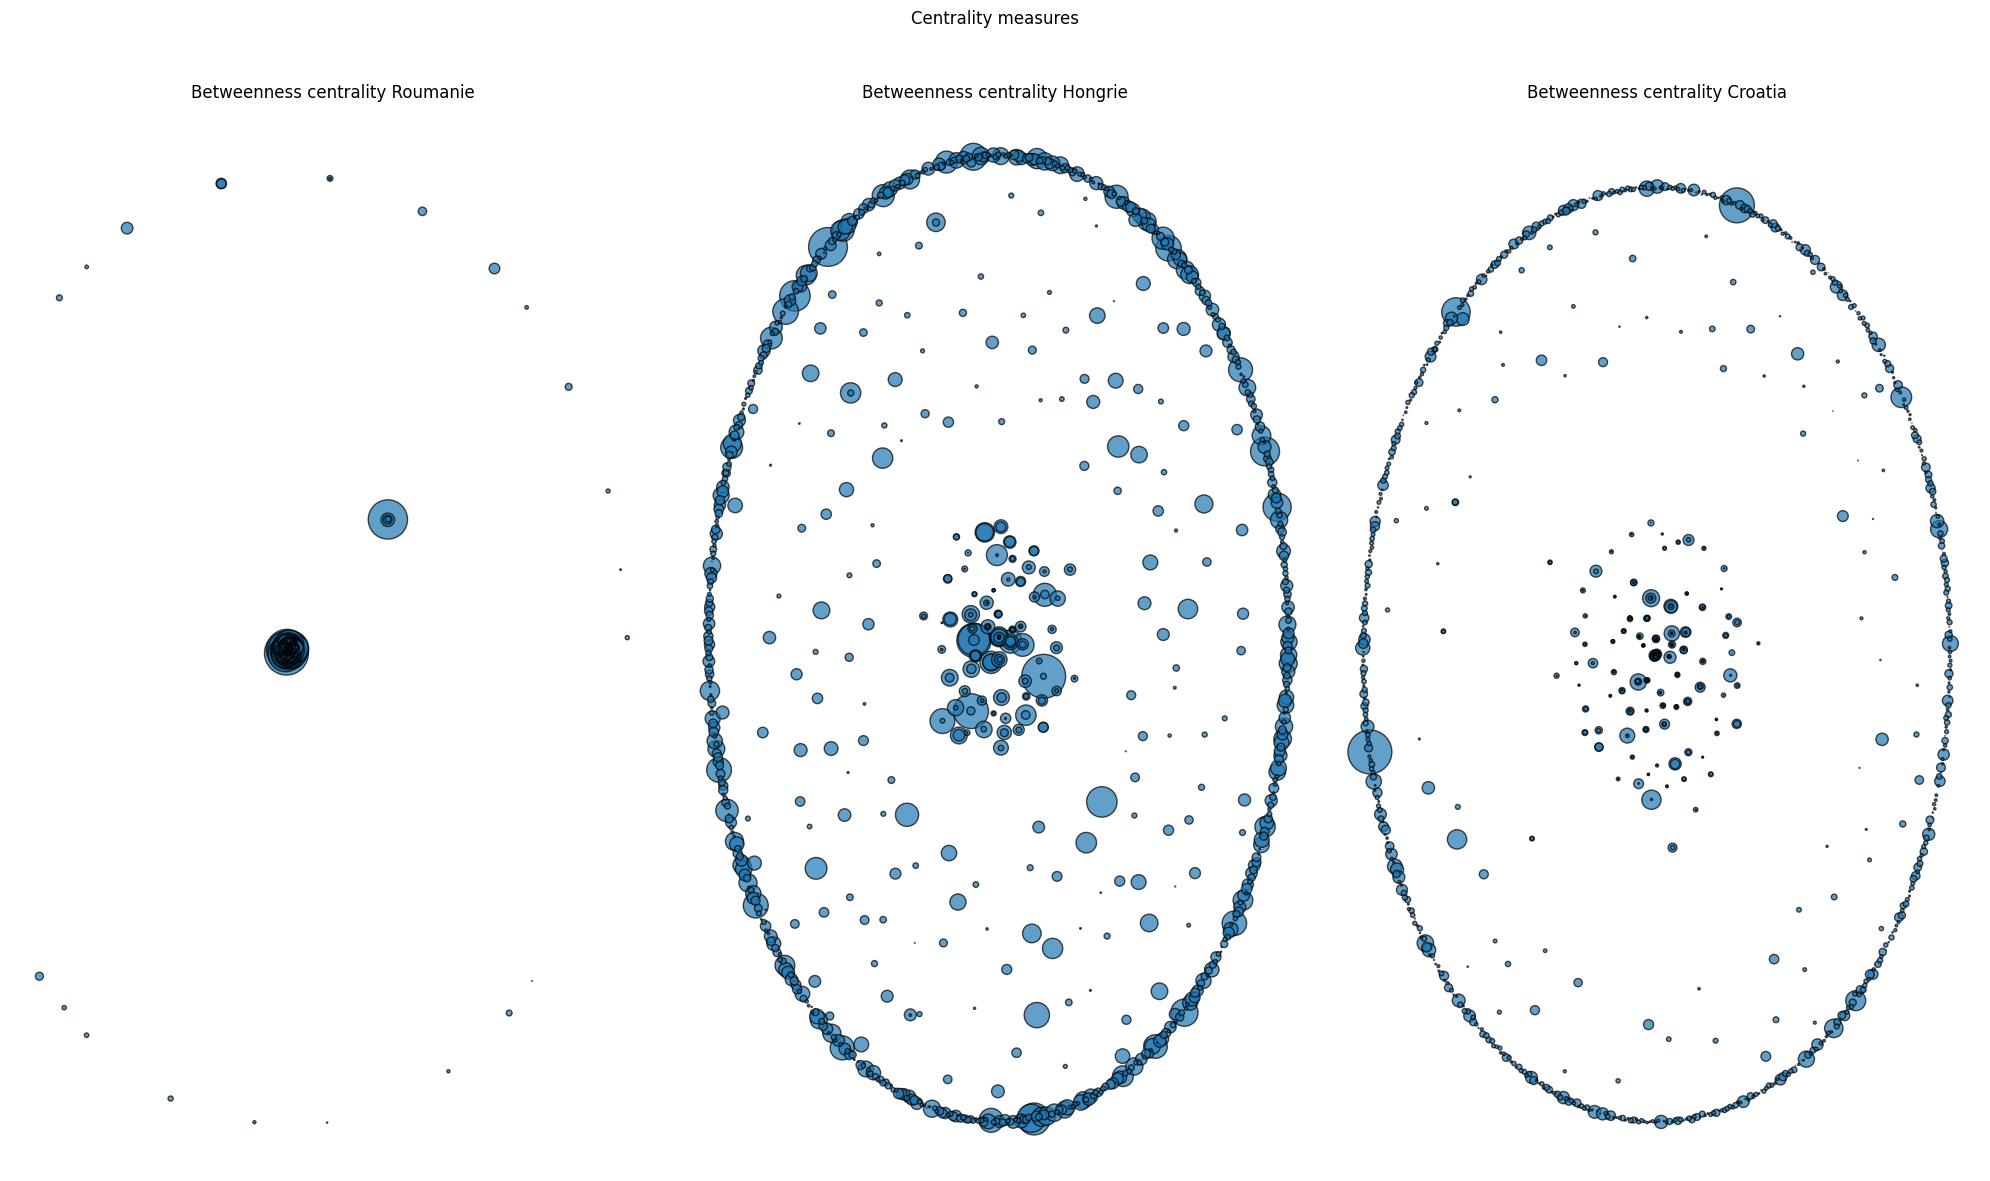

In [65]:
import matplotlib.cm as cm
import matplotlib.colors as colors
cte=1000
fig, ax = plt.subplots(1, 3, figsize=(20, 12))
fig.suptitle('Centrality measures')


best_nodes_RO = sorted(betweenness_RO.items(), key = lambda x: x[1], reverse = True)[:1000]
sub_RO = G_RO.subgraph([node for node, _ in best_nodes_RO])
pos_RO = nx.spring_layout(sub_RO, iterations = 1000)
nsize = np.array([value for _, value in best_nodes_RO])
nsize = cte*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(sub_RO, pos=pos_RO, node_size=nsize, edgecolors='black', alpha=.7, ax=ax[0])
edges = nx.draw_networkx_edges(sub_RO, pos=pos_RO, alpha=.1, ax=ax[0])
ax[0].set_title('Betweenness centrality Roumanie')
ax[0].axis('off')


best_nodes_HU = sorted(betweenness_HU.items(), key = lambda x: x[1], reverse = True)[:1000]
sub_HU = G_HU.subgraph([node for node, _ in best_nodes_RO])
pos_HU = nx.spring_layout(sub_HU, iterations = 1000)
nsize = np.array([value for _, value in best_nodes_HU])
nsize = cte*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(sub_HU, pos=pos_HU, node_size=nsize, edgecolors='black', alpha=.7, ax=ax[1])
edges = nx.draw_networkx_edges(sub_HU, pos=pos_HU,alpha=.1, ax=ax[1])
ax[1].set_title('Betweenness centrality Hongrie')
ax[1].axis('off')

best_nodes_HR = sorted(betweenness_HR.items(), key = lambda x: x[1], reverse = True)[:1000]
sub_HR = G_HR.subgraph([node for node, _ in best_nodes_RO])
pos_HR = nx.spring_layout(sub_HR, iterations = 1000)
nsize = np.array([value for _, value in best_nodes_HR])
nsize = cte*(nsize - min(nsize))/(max(nsize) - min(nsize))
nodes = nx.draw_networkx_nodes(sub_HR, pos=pos_HR, node_size=nsize, edgecolors='black', alpha=.7, ax=ax[2])
edges = nx.draw_networkx_edges(sub_HR, pos=pos_HR,alpha=.1, ax=ax[2])
ax[2].set_title('Betweenness centrality Croatia')
ax[2].axis('off')


# Afficher la figure
plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Ajuster l'espace pour le titre global
plt.show()

## Détection de communauté

In [19]:
from networkx.algorithms.community import greedy_modularity_communities

partition_RO = greedy_modularity_communities(G_RO)
print('Modularity Romanian Community:', nx.community.modularity(G_RO, partition_RO))
print('Number of Romanian communities:', len(partition_RO))

partition_HU = greedy_modularity_communities(G_HU)
print('Modularity Hungarian Community:', nx.community.modularity(G_HU, partition_HU))
print('# Hungarian communities:', len(partition_HU))

partition_HR = greedy_modularity_communities(G_HR)
print('Modularity Croatian Community:', nx.community.modularity(G_HR, partition_HR))
print('# Croatian communities:', len(partition_HR))

Modularity Romanian Community: 0.6723376784662286
Number of Romanian communities: 205
Modularity Hungarian Community: 0.5560302482153134
# Hungarian communities: 150
Modularity Croatian Community: 0.606624395737048
# Croatian communities: 134


In [36]:
element_sizes_RO = [len(element) for element in partition_RO]
average_size_RO = sum(element_sizes_RO) / len(element_sizes_RO)
print("Average community size in Romania", average_size_RO)

element_sizes_HU = [len(element) for element in partition_HU]
average_size_HU = sum(element_sizes_HU) / len(element_sizes_HU)
print("Average community size in Hungary", average_size_HU)

element_sizes_HR = [len(element) for element in partition_HR]
average_size_HR = sum(element_sizes_HR) / len(element_sizes_HR)
print("Average community size in Croatia", average_size_HR)


Average community size in Romania 203.77073170731708
Average community size in Hungary 316.92
Average community size in Croatia 407.26119402985074


In [20]:
import numpy as np

np.save('partition_HU.npy', partition_HU)
np.save('partition_RO.npy', partition_RO)
np.save('partition_HR.npy', partition_HR)

In [5]:
import numpy as np

partition_HU = np.load('partition_HU.npy', allow_pickle=True)
partition_RO = np.load('partition_RO.npy', allow_pickle=True)
partition_HR = np.load('partition_HR.npy', allow_pickle=True)


In [27]:
import pandas as pd

result_RO = {}
for index, community in enumerate(partition_RO):
    genre_counts = {}
    for node in community:
        genres_liked = genres_data_RO[node]
        for genre in genres_liked:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1/len(community)

    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genre_counts["main"] = f"{sorted_genres[0][0]}, {sorted_genres[1][0]}"
    genre_counts["size"] = len(community)
    result_RO[index] = genre_counts

df_RO = pd.DataFrame(result_RO).fillna(0).transpose()

result_HU = {}
for index, community in enumerate(partition_HU):
    genre_counts = {}
    for node in community:
        genres_liked = genres_data_HU[node]
        for genre in genres_liked:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1/len(community)

    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genre_counts["main"] = f"{sorted_genres[0][0]}, {sorted_genres[1][0]}"
    genre_counts["size"] = len(community)
    result_HU[index] = genre_counts

df_HU = pd.DataFrame(result_HU).fillna(0).transpose()

result_HR = {}
for index, community in enumerate(partition_HR):
    genre_counts = {}
    for node in community:
        genres_liked = genres_data_HR[node]
        for genre in genres_liked:
            genre_counts[genre] = genre_counts.get(genre, 0) + 1/len(community)

    sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)
    genre_counts["main"] = f"{sorted_genres[0][0]}, {sorted_genres[1][0]}"
    genre_counts["size"] = len(community)
    result_HR[index] = genre_counts

df_HR = pd.DataFrame(result_HR).fillna(0).transpose()

In [28]:
import numpy as np
df_RO['size'] = np.log(df_RO['size'].astype(float))
df_HU['size'] = np.log(df_HU['size'].astype(float))
df_HR['size'] = np.log(df_HR['size'].astype(float))


In [29]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np
import plotly.express as px


# Perform t-SNE
tsne = TSNE(n_components=2)
df_RO_preprocessed = df_RO.drop(columns=['size', 'main'])
df_RO_tsne = tsne.fit_transform(df_RO_preprocessed)

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame(df_RO_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_plotly['main'] = df_RO['main']
df_plotly['size'] = df_RO['size']*20


# Plot with Plotly
fig = px.scatter(df_plotly, x='TSNE Component 1', y='TSNE Component 2', color="main" ,hover_data='main', size="size", width=1000, height=500)
fig.update_layout(title='Musical genre communities in Romania')
fig.show()


tsne = TSNE(n_components=2)
df_HU_preprocessed = df_HU.drop(columns=['size', 'main'])
df_HU_tsne = tsne.fit_transform(df_HU_preprocessed)

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame(df_HU_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_plotly['main'] = df_HU['main']
df_plotly['size'] = df_HU['size']*20


# Plot with Plotly
fig = px.scatter(df_plotly, x='TSNE Component 1', y='TSNE Component 2', color="main" ,hover_data='main', size="size", width=1000, height=500)
fig.update_layout(title='Musical genre communities in Hungaria')
fig.show()


tsne = TSNE(n_components=2)
df_HR_preprocessed = df_HR.drop(columns=['size', 'main'])
df_HR_tsne = tsne.fit_transform(df_HR_preprocessed)

# Create a DataFrame for Plotly
df_plotly = pd.DataFrame(df_HR_tsne, columns=['TSNE Component 1', 'TSNE Component 2'])
df_plotly['main'] = df_HR['main']
df_plotly['size'] = df_HR['size']*20


# Plot with Plotly
fig = px.scatter(df_plotly, x='TSNE Component 1', y='TSNE Component 2', color="main" ,hover_data='main', size="size", width=1000, height=500)
fig.update_layout(title='Musical genre communities in Croatia')
fig.show()

## Détection de communauté (ML)

In [2]:
from gensim.models import KeyedVectors

embeddings = KeyedVectors.load_word2vec_format("HR_embeddings_10000.emb")

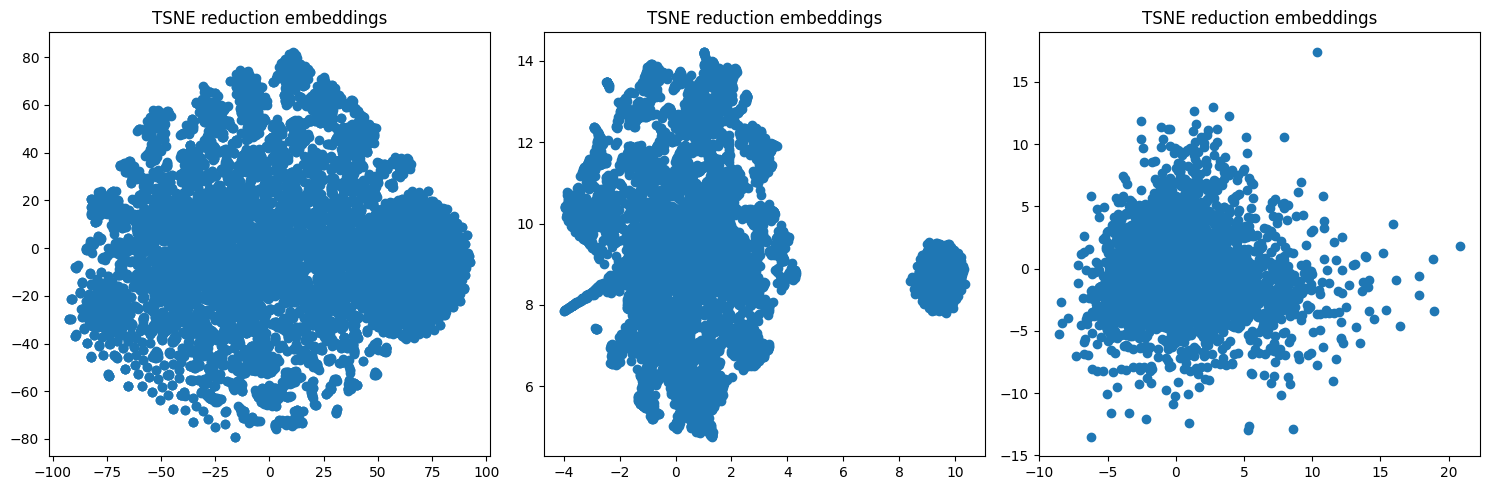

In [4]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import matplotlib.pyplot as plt

# Assuming embeddings is defined earlier in your code
embeddings_array = np.array(list(embeddings.vectors))

# TSNE
tsne_reducer = TSNE(n_components=2, random_state=42)
reduction_data_tsne = tsne_reducer.fit_transform(embeddings_array)

# UMAP
umap_reducer = umap.UMAP(n_components=2)
reduction_data_umap = umap_reducer.fit_transform(embeddings_array)

# PCA
pca_reducer = PCA(n_components=2, random_state=42)
reduction_data_pca = pca_reducer.fit_transform(embeddings_array)

# Plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(reduction_data_tsne[:, 0], reduction_data_tsne[:, 1])
plt.title('TSNE reduction embeddings')

plt.subplot(1, 3, 2)
plt.scatter(reduction_data_umap[:, 0], reduction_data_umap[:, 1])
plt.title('UMAP reduction embeddings')

plt.subplot(1, 3, 3)
plt.scatter(reduction_data_pca[:, 0], reduction_data_pca[:, 1])
plt.title('PCA reduction embeddings')

plt.tight_layout()
plt.show()